# Data1

In [ ]:
import pandas as pd
pd.set_option('display.max_columns',None)

In [ ]:
# Importing dataset on google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Portfolio/1. Capstone Projects/Disaster Management/Climate-related_Disasters_Frequency.csv')

In [ ]:
df1.Indicator.unique()

array(['Climate related disasters frequency, Number of Disasters: Drought',
       'Climate related disasters frequency, Number of Disasters: Extreme temperature',
       'Climate related disasters frequency, Number of Disasters: Flood',
       'Climate related disasters frequency, Number of Disasters: Landslide',
       'Climate related disasters frequency, Number of Disasters: Storm',
       'Climate related disasters frequency, Number of Disasters: TOTAL',
       'Climate related disasters frequency, Number of Disasters: Wildfire'],
      dtype=object)

In [ ]:
df1.drop(['ObjectId','ISO2','ISO3','Unit','CTS_Code','CTS_Name','CTS_Full_Descriptor','Source'], axis=1, inplace=True)

In [ ]:
def split_line(df1):
    word = df1.split(':')
    final = word[1]
    return final

In [ ]:
df1['Indicator'] = df1['Indicator'].apply(split_line)

In [ ]:
df1.shape

(970, 45)

In [ ]:
change_column_list = list(df1.columns)[2:]

In [ ]:
new_columns = [x.split('F')[1] for x in change_column_list ]

In [ ]:
col_mapping = {change_column_list[i]:new_columns[i] for i in range(len(change_column_list))}

In [ ]:
df1.rename(columns=col_mapping, inplace=True)

In [ ]:
percent_missing = df1.isnull().sum()*100/len(df1)
percent_missing = pd.DataFrame({'columns':df1.columns, 'pecentage_missing':percent_missing})
percent_missing.T

,Country,Indicator,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
columns,Country,Indicator,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
pecentage_missing,0.0,0.0,85.670103,85.463918,87.113402,81.649485,86.391753,85.257732,86.494845,81.237113,81.237113,84.020619,79.587629,82.474227,83.917526,79.175258,79.175258,78.453608,78.556701,74.226804,73.71134,68.659794,68.762887,69.381443,65.463918,70.0,71.752577,63.917526,74.123711,66.907216,69.690722,70.515464,64.536082,73.71134,69.587629,73.402062,75.257732,68.556701,73.608247,69.175258,70.103093,69.072165,68.041237,67.525773,69.278351


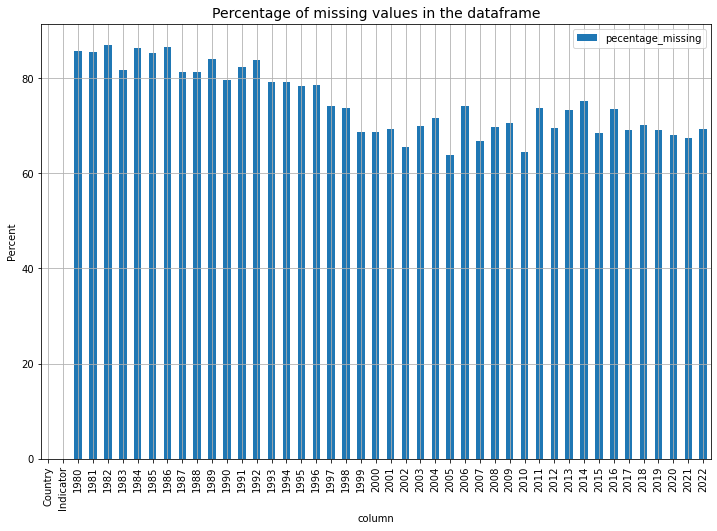

In [ ]:
import matplotlib.pyplot as plt
percent_missing.plot(kind='bar', figsize=(12,8), grid=True)
plt.title('Percentage of missing values in the dataframe', fontsize=14)
plt.xlabel('column')
plt.ylabel('Percent')
plt.show()

### Conclusion: It has huge number of missing value, i.e., greater than 70%. So, this data is useless.

# Data2

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Portfolio/1. Capstone Projects/Disaster Management/natural-disasters.csv')

In [ ]:
df2.shape

(3055, 172)

In [ ]:
df2.select_dtypes(include=['float']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3055 entries, 0 to 3054
Columns: 123 entries, Number of deaths from drought to total_affected_rate_per_100k_all_disasters
dtypes: float64(123)
memory usage: 2.9 MB


In [ ]:
# df2.select_dtypes(include=['object']).isnull().sum().sum()  # no missing value
# df2.select_dtypes(include=['int64']).isnull().sum().sum()  # no missing value
# df2.select_dtypes(include=['float']).isnull().sum().sum()  # 15597 missing value

In [ ]:
# let's observe the percentage of missing rows in float columns only
percent_missing = df2.select_dtypes(include=['float']).isnull().sum()*100/len(df2)
percent_missing = pd.DataFrame({'columns':df2.select_dtypes(include=['float']).columns, 'pecentage_missing':percent_missing})
percent_missing.T

,Number of deaths from drought,Number of people injured from drought,Number of people affected from drought,Number of total people affected by drought,Death rates from drought,Injury rates from drought,"Number of people affected by drought per 100,000","Total number of people affected by drought per 100,000",Number of deaths from earthquakes,Number of people injured from earthquakes,Number of people affected by earthquakes,Number of people left homeless from earthquakes,Number of total people affected by earthquakes,Total economic damages from earthquakes,Death rates from earthquakes,Injury rates from earthquakes,"Number of people affected by earthquakes per 100,000",Homelessness rate from earthquakes,"Total number of people affected by earthquakes per 100,000",Number of deaths from disasters,Number of people injured from disasters,Number of people affected by disasters,Number of people left homeless from disasters,Number of total people affected by disasters,Total economic damages from disasters,Death rates from disasters,Injury rates from disasters,"Number of people affected by disasters per 100,000",Homelessness rate from disasters,"Total number of people affected by disasters per 100,000",Number of deaths from volcanic activity,Number of people injured from volcanic activity,Number of people affected by volcanic activity,Number of total people affected by volcanic activity,Total economic damages from volcanic activity,Death rates from volcanic activity,Injury rates from volcanic activity,"Number of people affected by volcanic activity per 100,000",Homelessness rate from volcanic activity,"Total number of people affected by volcanic activity per 100,000",Number of deaths from floods,Number of people injured from floods,Number of people affected by floods,Number of people left homeless from floods,Number of total people affected by floods,Total economic damages from floods,Death rates from floods,Injury rates from floods,"Number of people affected by floods per 100,000",Homelessness rate from floods,"Total number of people affected by floods per 100,000",Number of deaths from mass movements,Number of people injured from mass movements,Number of people affected by mass movements,Number of people left homeless from mass movements,Number of total people affected by mass movements,Death rates from mass movements,Injury rates from mass movements,"Number of people affected by mass movements per 100,000",Homelessness rate from mass movements,"Total number of people affected by mass movements per 100,000",Number of deaths from storms,Number of people injured from storms,Number of people affected by storms,Number of people left homeless from storms,Number of total people affected by storms,Total economic damages from storms,Death rates from storms,Injury rates from storms,"Number of people affected by storms per 100,000",Homelessness rate from storms,"Total number of people affected by storms per 100,000",Number of deaths from landslides,Number of people injured from landslides,Number of people affected by landslides,Number of people left homeless from landslides,Number of total people affected by landslides,Death rates from landslides,Injury rates from landslides,"Number of people affected by landslides per 100,000",Homelessness rate from landslides,"Total number of people affected by landslides per 100,000",Death rates from fog,Number of deaths from wildfires,Number of people injured from wildfires,Number of people affected by wildfires,Number of people left homeless from wildfires,Number of total people affected by wildfires,Total economic damages from wildfires,Death rates from wildfires,Injury rates from wildfires,"Number of people affected by wildfires per 100,000",Homelessness rate from wildfires,"Total number of people affected by wildfires per 100,000",Number of deaths from extreme temperatures,Number of people injured from extreme temperatures,Number of people affected by extreme temperatures,Number of people left homeless 

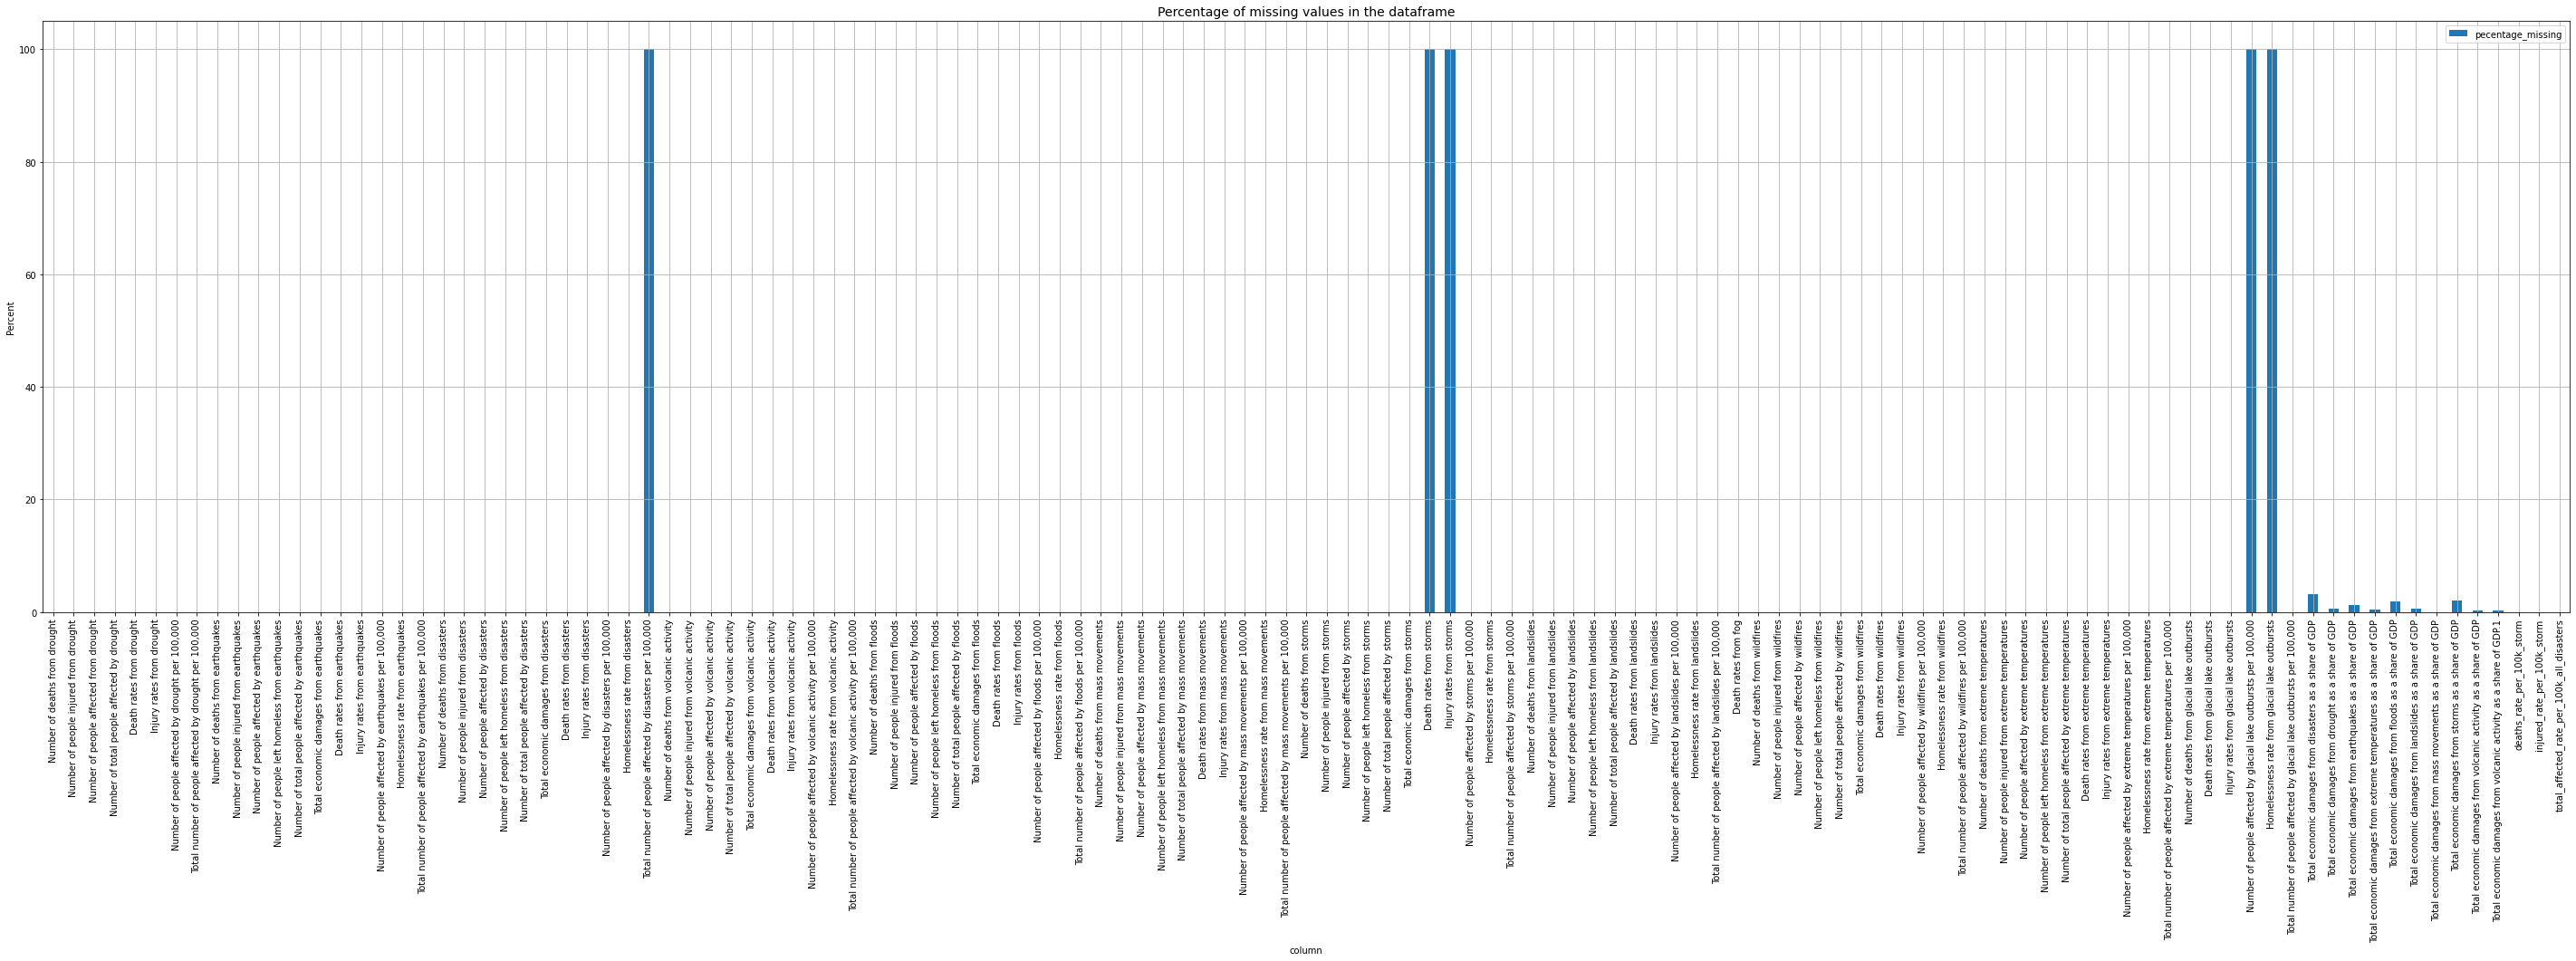

In [ ]:
import matplotlib.pyplot as plt
percent_missing.plot(kind='bar', figsize=(50,12), grid=True)
plt.title('Percentage of missing values in the dataframe', fontsize=14)
plt.xlabel('column')
plt.ylabel('Percent')
plt.show()

In [ ]:
percent_missing_df = percent_missing.reset_index().drop(['index'], axis=1)

In [ ]:
null_columns = percent_missing_df[percent_missing_df['pecentage_missing']>=5]['columns']

In [ ]:
null_columns

29     Total number of people affected by disasters p...
67                               Death rates from storms
68                              Injury rates from storms
107    Number of people affected by glacial lake outb...
108        Homelessness rate from glacial lake outbursts
Name: columns, dtype: object

In [ ]:
len(list(df2.columns)) - len(list(null_columns))

167

In [ ]:
final_columns = [col for col in list(df2.columns) if col not in list(null_columns)]

In [ ]:
len(final_columns)

167

In [ ]:
new_df = df2[final_columns]

In [ ]:
new_df.shape

(3055, 167)

In [ ]:
new_df.isnull().sum().sum()

322

In [ ]:
column_with_few_null = new_df.columns[new_df.isnull().any()].tolist()

In [ ]:
new_df[column_with_few_null] = new_df[column_with_few_null].fillna(new_df[column_with_few_null].mean())

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
new_df.isnull().sum().sum() # no null value

0

In [ ]:
new_df.shape

(3055, 167)

In [ ]:
new_df

,Country name,Year,Number of deaths from drought,Number of people injured from drought,Number of people affected from drought,Number of people left homeless from drought,Number of total people affected by drought,Reconstruction costs from drought,Insured damages against drought,Total economic damages from drought,Death rates from drought,Injury rates from drought,"Number of people affected by drought per 100,000",Homelessness rate from drought,"Total number of people affected by drought per 100,000",Number of deaths from earthquakes,Number of people injured from earthquakes,Number of people affected by earthquakes,Number of people left homeless from earthquakes,Number of total people affected by earthquakes,Reconstruction costs from earthquakes,Insured damages against earthquakes,Total economic damages from earthquakes,Death rates from earthquakes,Injury rates from earthquakes,"Number of people affected by earthquakes per 100,000",Homelessness rate from earthquakes,"Total number of people affected by earthquakes per 100,000",Number of deaths from disasters,Number of people injured from disasters,Number of people affected by disasters,Number of people left homeless from disasters,Number of total people affected by disasters,Reconstruction costs from disasters,Insured damages against disasters,Total economic damages from disasters,Death rates from disasters,Injury rates from disasters,"Number of people affected by disasters per 100,000",Homelessness rate from disasters,Number of deaths from volcanic activity,Number of people injured from volcanic activity,Number of people affected by volcanic activity,Number of people left homeless from volcanic activity,Number of total people affected by volcanic activity,Reconstruction costs from volcanic activity,Insured damages against volcanic activity,Total economic damages from volcanic activity,Death rates from volcanic activity,Injury rates from volcanic activity,"Number of people affected by volcanic activity per 100,000",Homelessness rate from volcanic activity,"Total number of people affected by volcanic activity per 100,000",Number of deaths from floods,Number of people injured from floods,Number of people affected by floods,Number of people left homeless from floods,Number of total people affected by floods,Reconstruction costs from floods,Insured damages against floods,Total economic damages from floods,Death rates from floods,Injury rates from floods,"Number of people affected by floods per 100,000",Homelessness rate from floods,"Total number of people affected by floods per 100,000",Number of deaths from mass movements,Number of people injured from mass movements,Number of people affected by mass movements,Number of people left homeless from mass movements,Number of total people affected by mass movements,Reconstruction costs from mass movements,Insured damages against mass movements,Total economic damages from mass movements,Death rates from mass movements,Injury rates from mass movements,"Number of people affected by mass movements per 100,000",Homelessness rate from mass movements,"Total number of people affected by mass movements per 100,000",Number of deaths from storms,Number of people injured from storms,Number of people affected by storms,Number of people left homeless from storms,Number of total people affected by storms,Reconstruction costs from storms,Insured damages against storms,Total economic damages from storms,"Number of people affected by storms per 100,000",Homelessness rate from storms,"Total number of people affected by storms per 100,000",Number of deaths from landslides,Number of people injured from landslides,Number of people affected by landslides,Number of people left homeless from landslides,Number of total people affected by landslides,Reconstruction costs from landslides,Insured damages against landslides,Total economic damages from landslides,Death rates from landslides,Injury rates from landslides,"Number of people affected by landslides per 100,00

### Conclusion: Data 2 is useful. We will work on it in future. For now lets look into other data for null value treatment

# Data3

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/Portfolio/1. Capstone Projects/Disaster Management/natural-disasters2.csv')

In [ ]:
df3

,Country name,Year,Number of deaths from drought,Number of people injured from drought,Number of people affected from drought,Number of people left homeless from drought,Number of total people affected by drought,Reconstruction costs from drought,Insured damages against drought,Total economic damages from drought,Death rates from drought,Injury rates from drought,"Number of people affected by drought per 100,000",Homelessness rate from drought,"Total number of people affected by drought per 100,000",Number of deaths from earthquakes,Number of people injured from earthquakes,Number of people affected by earthquakes,Number of people left homeless from earthquakes,Number of total people affected by earthquakes,Reconstruction costs from earthquakes,Insured damages against earthquakes,Total economic damages from earthquakes,Death rates from earthquakes,Injury rates from earthquakes,"Number of people affected by earthquakes per 100,000",Homelessness rate from earthquakes,"Total number of people affected by earthquakes per 100,000",Number of deaths from disasters,Number of people injured from disasters,Number of people affected by disasters,Number of people left homeless from disasters,Number of total people affected by disasters,Reconstruction costs from disasters,Insured damages against disasters,Total economic damages from disasters,Death rates from disasters,Injury rates from disasters,"Number of people affected by disasters per 100,000",Homelessness rate from disasters,"Total number of people affected by disasters per 100,000",Number of deaths from volcanic activity,Number of people injured from volcanic activity,Number of people affected by volcanic activity,Number of people left homeless from volcanic activity,Number of total people affected by volcanic activity,Reconstruction costs from volcanic activity,Insured damages against volcanic activity,Total economic damages from volcanic activity,Death rates from volcanic activity,Injury rates from volcanic activity,"Number of people affected by volcanic activity per 100,000",Homelessness rate from volcanic activity,"Total number of people affected by volcanic activity per 100,000",Number of deaths from floods,Number of people injured from floods,Number of people affected by floods,Number of people left homeless from floods,Number of total people affected by floods,Reconstruction costs from floods,Insured damages against floods,Total economic damages from floods,Death rates from floods,Injury rates from floods,"Number of people affected by floods per 100,000",Homelessness rate from floods,"Total number of people affected by floods per 100,000",Number of deaths from mass movements,Number of people injured from mass movements,Number of people affected by mass movements,Number of people left homeless from mass movements,Number of total people affected by mass movements,Reconstruction costs from mass movements,Insured damages against mass movements,Total economic damages from mass movements,Death rates from mass movements,Injury rates from mass movements,"Number of people affected by mass movements per 100,000",Homelessness rate from mass movements,"Total number of people affected by mass movements per 100,000",Number of deaths from storms,Number of people injured from storms,Number of people affected by storms,Number of people left homeless from storms,Number of total people affected by storms,Reconstruction costs from storms,Insured damages against storms,Total economic damages from storms,Death rates from storms,Injury rates from storms,"Number of people affected by storms per 100,000",Homelessness rate from storms,"Total number of people affected by storms per 100,000",Number of deaths from landslides,Number of people injured from landslides,Number of people affected by landslides,Number of people left homeless from landslides,Number of total people affected by landslides,Reconstruction costs from landslides,Insured damages against landslides,Total economic damages from landslides,

In [ ]:
df3.shape

(6952, 169)

In [ ]:
df3.select_dtypes(include=['int64']).shape

(6952, 9)

In [ ]:
# df3.select_dtypes(include=['object']).isnull().sum().sum()  # no missing value
# df3.select_dtypes(include=['int64']).isnull().sum().sum()  # no missing value
df3.select_dtypes(include=['float']).isnull().sum().sum()  # 871704 missing value

871704

In [ ]:
# let's observe the percentage of missing rows in float columns only
percent_missing = df3.select_dtypes(include=['float']).isnull().sum()*100/len(df3)
percent_missing = pd.DataFrame({'columns':df3.select_dtypes(include=['float']).columns, 'pecentage_missing':percent_missing})
percent_missing.T

,Number of deaths from drought,Number of people injured from drought,Number of people affected from drought,Number of people left homeless from drought,Number of total people affected by drought,Reconstruction costs from drought,Insured damages against drought,Total economic damages from drought,Death rates from drought,Injury rates from drought,"Number of people affected by drought per 100,000",Homelessness rate from drought,"Total number of people affected by drought per 100,000",Number of deaths from earthquakes,Number of people injured from earthquakes,Number of people affected by earthquakes,Number of people left homeless from earthquakes,Number of total people affected by earthquakes,Reconstruction costs from earthquakes,Insured damages against earthquakes,Total economic damages from earthquakes,Death rates from earthquakes,Injury rates from earthquakes,"Number of people affected by earthquakes per 100,000",Homelessness rate from earthquakes,"Total number of people affected by earthquakes per 100,000",Death rates from disasters,Injury rates from disasters,"Number of people affected by disasters per 100,000",Homelessness rate from disasters,"Total number of people affected by disasters per 100,000",Number of deaths from volcanic activity,Number of people injured from volcanic activity,Number of people affected by volcanic activity,Number of people left homeless from volcanic activity,Number of total people affected by volcanic activity,Reconstruction costs from volcanic activity,Insured damages against volcanic activity,Total economic damages from volcanic activity,Death rates from volcanic activity,Injury rates from volcanic activity,"Number of people affected by volcanic activity per 100,000",Homelessness rate from volcanic activity,"Total number of people affected by volcanic activity per 100,000",Number of deaths from floods,Number of people injured from floods,Number of people affected by floods,Number of people left homeless from floods,Number of total people affected by floods,Reconstruction costs from floods,Insured damages against floods,Total economic damages from floods,Death rates from floods,Injury rates from floods,"Number of people affected by floods per 100,000",Homelessness rate from floods,"Total number of people affected by floods per 100,000",Number of deaths from mass movements,Number of people injured from mass movements,Number of people affected by mass movements,Number of people left homeless from mass movements,Number of total people affected by mass movements,Reconstruction costs from mass movements,Insured damages against mass movements,Total economic damages from mass movements,Death rates from mass movements,Injury rates from mass movements,"Number of people affected by mass movements per 100,000",Homelessness rate from mass movements,"Total number of people affected by mass movements per 100,000",Number of deaths from storms,Number of people injured from storms,Number of people affected by storms,Number of people left homeless from storms,Number of total people affected by storms,Reconstruction costs from storms,Insured damages against storms,Total economic damages from storms,Death rates from storms,Injury rates from storms,"Number of people affected by storms per 100,000",Homelessness rate from storms,"Total number of people affected by storms per 100,000",Number of deaths from landslides,Number of people injured from landslides,Number of people affected by landslides,Number of people left homeless from landslides,Number of total people affected by landslides,Reconstruction costs from landslides,Insured damages against landslides,Total economic damages from landslides,Death rates from landslides,Injury rates from landslides,"Number of people affected by landslides per 100,000",Homelessness rate from landslides,"Total number of people affected by landslides per 100,000",Number of deaths from fog,Number of people injured from fog,Number of people affected by fog,Number of people left homeless

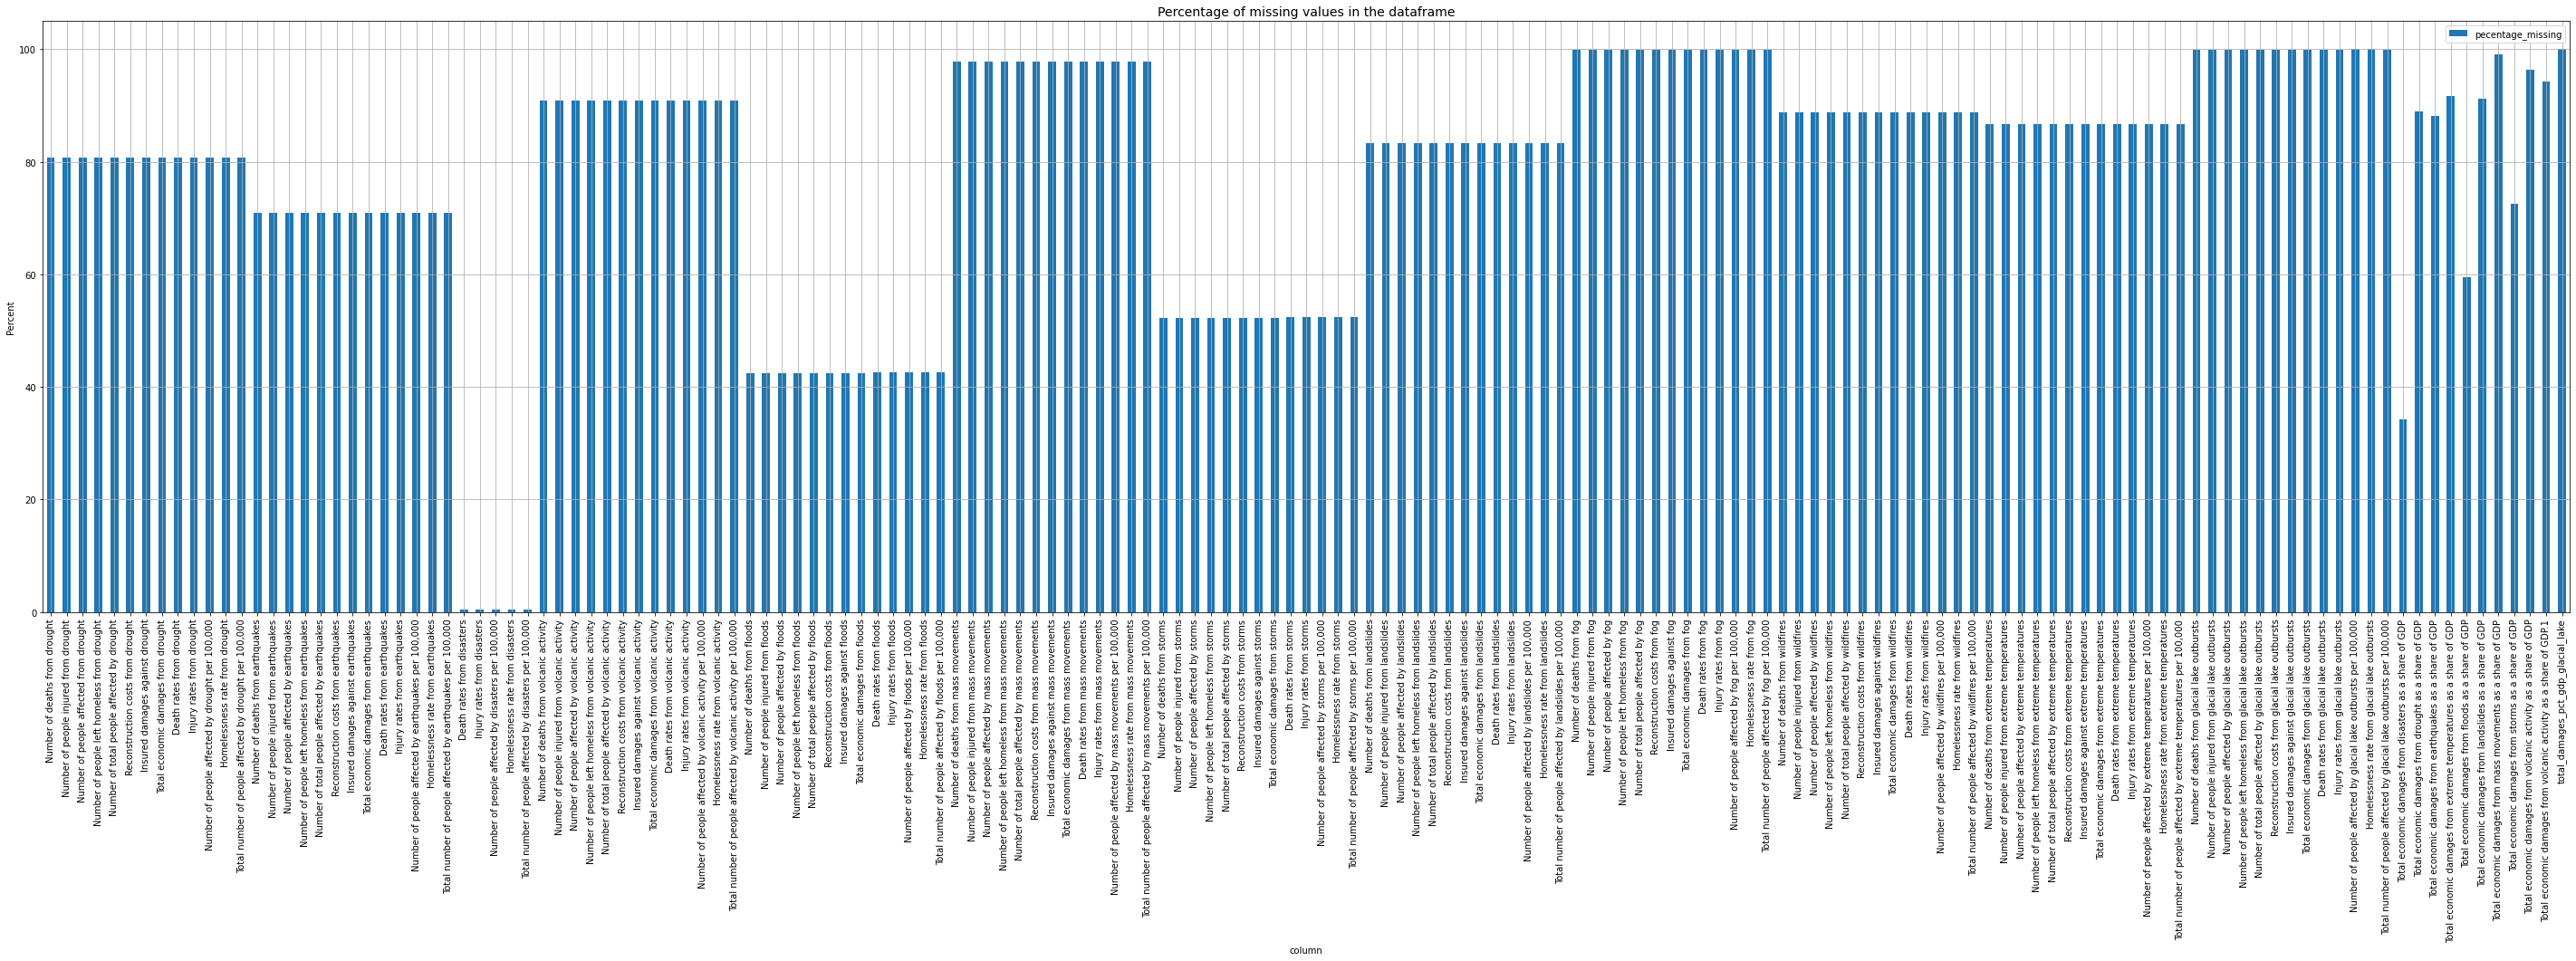

In [ ]:
import matplotlib.pyplot as plt
percent_missing.plot(kind='bar', figsize=(50,12), grid=True)
plt.title('Percentage of missing values in the dataframe', fontsize=14)
plt.xlabel('column')
plt.ylabel('Percent')
plt.show()

### Although it has all its integer column with no null values but more than 90% of the columns are float and has huge null values in them. So, the dataset is not that useful.

# Data4

In [ ]:
df4 = pd.read_csv('/content/drive/MyDrive/Portfolio/1. Capstone Projects/Disaster Management/Natural_Disasters_in_India .csv')

In [ ]:
df4.shape

(207, 3)

In [ ]:
df4.isnull().sum().sum()

0

### Conclusion: This data has no null value. So, we'll directly use it later.

# Data5

In [ ]:
df5 = pd.read_csv('/content/drive/MyDrive/Portfolio/1. Capstone Projects/Disaster Management/significant-earthquakes.csv')

In [ ]:
df5.shape

(143640, 4)

In [ ]:
df5.head()

,Entity,Code,Year,Significant earthquake events (NGDC-NASA)
0,Afghanistan,AFG,-2150,0
1,Afghanistan,AFG,-2000,0
2,Afghanistan,AFG,-1610,0
3,Afghanistan,AFG,-1566,0
4,Afghanistan,AFG,-1450,0


In [ ]:
df5.drop('Code', axis=1, inplace=True)

In [ ]:
df5.rename(columns = {'Entity':'Country'}, inplace=True)

In [ ]:
df5[df5['Country']=='Afghanistan']['Significant earthquake events (NGDC-NASA)'].sum()

56

In [ ]:
df_country_total = df5.groupby('Country')['Significant earthquake events (NGDC-NASA)'].sum().reset_index().sort_values(by='Significant earthquake events (NGDC-NASA)', ascending=False)

In [ ]:
df_country_total.head()

,Country,Significant earthquake events (NGDC-NASA)
149,World,6011
27,China,587
69,Japan,400
63,Iran,369
62,Indonesia,368


In [ ]:
df_year_total = df5.groupby('Year')['Significant earthquake events (NGDC-NASA)'].sum().reset_index().sort_values(by='Significant earthquake events (NGDC-NASA)', ascending=False)

In [ ]:
df_year_total.head()

,Year,Significant earthquake events (NGDC-NASA)
931,2004,156
935,2008,154
930,2003,144
934,2007,134
933,2006,122


In [ ]:
df_country_year = df5.groupby(['Country','Year'])['Significant earthquake events (NGDC-NASA)'].sum().reset_index().sort_values(by='Significant earthquake events (NGDC-NASA)', ascending=False)

In [ ]:
input_country = str(input('Enter the country to display total earthquakes with time\n'))
total_events = df_country_year[df_country_year['Country']==(input_country[0].upper() + input_country[1:])].drop('Country',axis=1)
print(f"Total number of major earthquakes in {input_country} till now: {total_events['Significant earthquake events (NGDC-NASA)'].sum()}")
total_events

Enter the country to display total earthquakes with time
India
Total number of major earthquakes in India till now: 90


,Year,Significant earthquake events (NGDC-NASA)
57632,2005,8
57638,2011,5
57637,2010,5
57636,2009,5
57635,2008,4
...,...,...
57304,1670,0
57302,1668,0
57301,1667,0
57300,1666,0


In [ ]:
df_year_world = df5.groupby(['Year','Country'])['Significant earthquake events (NGDC-NASA)'].sum().reset_index().sort_values(by='Significant earthquake events (NGDC-NASA)', ascending=False)

In [ ]:
input_year = int(input('Enter the year to display total earthquakes by country'))
df_year_world[df_year_world['Year']==input_year]

Enter the year to display total earthquakes by country2004


,Year,Country,Significant earthquake events (NGDC-NASA)
141661,2004,World,78
141574,2004,Indonesia,12
141581,2004,Japan,8
141649,2004,Turkey,7
141575,2004,Iran,6
...,...,...,...
141543,2004,Cote d'Ivoire,0
141541,2004,Congo,0
141537,2004,Central African Republic,0
141535,2004,Cameroon,0


### Data5 is very interesting. We will dive deep into the dataset later. Let's for now look at other available dataset.

# Data6

In [ ]:
import pandas as pd
df6 = pd.read_csv('/content/drive/MyDrive/Portfolio/1. Capstone Projects/Disaster Management/total-affected-natural-disasters-csv-1.csv')

In [ ]:
df6.drop('Country Code', axis=1, inplace=True)

In [ ]:
###### Transpose the DataFrame to have years as rows
df6 = df6.set_index('Country Name').T.reset_index()

# Rename the columns
df6.columns.name = None  # Remove the columns' name
df6 = df6.rename(columns={'index': 'Year'})

In [ ]:
df6 = pd.melt(df6, id_vars=['Year'], var_name='Country Name', value_name='Value')

In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24610 entries, 0 to 24609
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          24610 non-null  object 
 1   Country Name  24610 non-null  object 
 2   Value         4928 non-null   float64
dtypes: float64(1), object(2)
memory usage: 576.9+ KB


In [ ]:
df_new = df6[~df6['Value'].isna()]

In [ ]:
df_new.isnull().sum().sum()

0

In [ ]:
df_new.rename(columns={'Value':'people_affected_by_natural_disaster'},inplace=True)

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [ ]:
df_new

,Year,Country Name,people_affected_by_natural_disaster
0,2014,AFGHANISTAN,120000.0
1,2013,AFGHANISTAN,21628.0
2,2012,AFGHANISTAN,51501.0
3,2011,AFGHANISTAN,1762815.0
4,2010,AFGHANISTAN,46200.0
...,...,...,...
24513,1996,ZIMBABWE,500000.0
24517,1992,ZIMBABWE,5649.0
24518,1991,ZIMBABWE,5000000.0
24527,1982,ZIMBABWE,0.0


In [ ]:
df_country_total = df_new.groupby('Country Name')['people_affected_by_natural_disaster'].mean().reset_index().sort_values(by='people_affected_by_natural_disaster', ascending=False)

In [ ]:
df_country_total.head(10)

,Country Name,people_affected_by_natural_disaster
38,CHINA P REP,4.080199e+07
85,INDIA,2.407660e+07
14,BANGLADESH,6.249998e+06
150,PHILIPPINES,2.459818e+06
188,THAILAND,2.327764e+06
207,VIET NAM,2.019545e+06
96,KENYA,1.840440e+06
143,PAKISTAN,1.578725e+06
59,ETHIOPIA,1.546391e+06
25,BRAZIL,1.384650e+06


In [ ]:
df_year_total = df_new.groupby('Year')['people_affected_by_natural_disaster'].sum().reset_index().sort_values(by='people_affected_by_natural_disaster', ascending=False)

In [ ]:
print('People affected across the globe by natural disasters')
df_year_total.head(10)

People affected across the globe by natural disasters


,Year,people_affected_by_natural_disaster
102,2002,658608535.0
87,1987,374217254.0
98,1998,343745984.0
91,1991,285408128.0
99,1999,281920791.0
94,1994,273924974.0
110,2010,257890131.0
103,2003,255080892.0
95,1995,222740396.0
108,2008,221979978.0


In [ ]:
df_country_year = df_new.groupby(['Country Name','Year'])['people_affected_by_natural_disaster'].sum().reset_index().sort_values(by='people_affected_by_natural_disaster', ascending=False)

In [ ]:
input_country = str(input('Enter the country to display total people affected with time\n'))
total_events = df_country_year[df_country_year['Country Name']==input_country.upper()].drop('Country Name',axis=1)
print(f"Total number of affected in {input_country} till now: {total_events['people_affected_by_natural_disaster'].sum()}")
total_events

Enter the country to display total people affected with time
India
Total number of affected in India till now: 2022434202.0


,Year,people_affected_by_natural_disaster
2047,2002,342028850.0
2032,1987,318380000.0
2017,1972,204530075.0
2027,1982,138800493.0
2038,1993,129338050.0
...,...,...
1991,1944,0.0
1993,1946,0.0
1994,1948,0.0
1995,1949,0.0


In [ ]:
df_year_world = df_new.groupby(['Year','Country Name'])['people_affected_by_natural_disaster'].sum().reset_index().sort_values(by='people_affected_by_natural_disaster', ascending=False)

In [ ]:
input_year = str(input('Enter the year to display total earthquakes by country'))
print(f"Total people affected in year {input_year} is {round(df_year_world[df_year_world['Year']==input_year]['people_affected_by_natural_disaster'].sum())}")
df_year_world[df_year_world['Year']==input_year]

Enter the year to display total earthquakes by country2004
Total people affected in year 2004 is 161836249


,Year,Country Name,people_affected_by_natural_disaster
3678,2004,CHINA P REP,52949587.0
3661,2004,BANGLADESH,36889954.0
3704,2004,INDIA,33860512.0
3755,2004,SOUTH AFRICA,15015174.0
3772,2004,UNITED STATES,5100821.0
...,...,...,...
3766,2004,TONGA,0.0
3758,2004,ST LUCIA,0.0
3747,2004,SAMOA,0.0
3742,2004,PORTUGAL,0.0


### Data6 is very similar to Data5. So, we will combine the two for further work in future. For now, lets see the other left data.

# Data7

In [ ]:
import pandas as pd
df7 = pd.read_csv('/content/drive/MyDrive/Portfolio/1. Capstone Projects/Disaster Management/homeless-natural-disasters-csv-1.csv')

In [ ]:
df7.head()

,Country Code,Country Name,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990,1989,1988,1987,1986,1985,1984,1983,1982,1981,1980,1979,1978,1977,1976,1975,1974,1973,1972,1971,1970,1969,1968,1967,1966,1965,1964,1963,1962,1961,1960,1959,1958,1957,1956,1955,1954,1953,1952,1951,1950,1949,1948,1947,1946,1945,1944,1943,1942,1941,1940,1939,1938,1937,1936,1935,1934,1933,1932,1931,1930,1929,1928,1927,1926,1925,1924,1923,1922,1921,1920,1919,1918,1917,1916,1915,1914,1913,1912,1911,1910,1909,1908,1907,1906,1905,1904,1903,1902,1901,1900
0,AFG,AFGHANISTAN,0.0,0.0,2680.0,9700.0,1000.0,3250.0,180.0,3480.0,8210.0,6775.0,2700.0,4250.0,10000.0,250.0,0.0,31275.0,45000.0,750.0,750.0,7610.0,0.0,1000.0,0.0,9400.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,6580.0,0.0,NaN,0.0,NaN,7500.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALB,ALBANIA,NaN,NaN,0.0,NaN,0.0,150.0,NaN,75.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,1340.0,NaN,NaN,5000.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DZA,ALGERIA,NaN,NaN,0.0,0.0,0.0,2500.0,0.0,0.0,150.0,1750.0,0.0,200000.0,0.0,0.0,100.0,15700.0,NaN,3000.0,0.0,NaN,30000.0,650.0,2250.0,0.0,NaN,0.0,200.0,0.0,NaN,15000.0,1470.0,NaN,0.0,0.0,443000.0,0.0,NaN,NaN,NaN,NaN,0.0,61000.0,NaN,NaN,NaN,0.0,NaN,0.0,15900.0,12000.0,NaN,0.0,NaN,NaN,1250.0,NaN,NaN,NaN,NaN,NaN,129250.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ASM,AMERICAN SAMOA,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,3000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,ANGOLA,NaN,0.0,0.0,100.0,78875.0,5065.0,0.0,6000.0,225.0,10000.0,1700.0,825.0,0.0,0.0,9000.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df7.drop('Country Code', axis=1, inplace=True)

In [ ]:
###### Transpose the DataFrame to have years as rows
df7 = df7.set_index('Country Name').T.reset_index()

# Rename the columns
df7.columns.name = None  # Remove the columns' name
df7 = df7.rename(columns={'index': 'Year'})

In [ ]:
df7 = pd.melt(df7, id_vars=['Year'], var_name='Country Name', value_name='Value')

In [ ]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24610 entries, 0 to 24609
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          24610 non-null  object 
 1   Country Name  24610 non-null  object 
 2   Value         4928 non-null   float64
dtypes: float64(1), object(2)
memory usage: 576.9+ KB


In [ ]:
df_new2 = df7[~df7['Value'].isna()]

In [ ]:
df_new2.isnull().sum().sum()

0

In [ ]:
df_new2.rename(columns={'Value':'people_homeless_by_natural_disaster'},inplace=True)

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [ ]:
df_new2

,Year,Country Name,people_homeless_by_natural_disaster
0,2014,AFGHANISTAN,0.0
1,2013,AFGHANISTAN,0.0
2,2012,AFGHANISTAN,2680.0
3,2011,AFGHANISTAN,9700.0
4,2010,AFGHANISTAN,1000.0
...,...,...,...
24513,1996,ZIMBABWE,0.0
24517,1992,ZIMBABWE,0.0
24518,1991,ZIMBABWE,0.0
24527,1982,ZIMBABWE,0.0


In [ ]:
df_country_total = df_new2.groupby('Country Name')['people_homeless_by_natural_disaster'].mean().reset_index().sort_values(by='people_homeless_by_natural_disaster', ascending=False)

In [ ]:
df_country_total.head(10)

,Country Name,people_homeless_by_natural_disaster
38,CHINA P REP,831913.026316
85,INDIA,379294.404762
14,BANGLADESH,210263.676471
143,PAKISTAN,173188.909091
207,VIET NAM,113471.785714
174,SRI LANKA,105110.116279
150,PHILIPPINES,80529.907895
63,FRENCH GUIANA,70000.000000
98,KOREA DEM P REP,67485.631579
179,SUDAN,42749.411765


In [ ]:
df_year_total = df_new2.groupby('Year')['people_homeless_by_natural_disaster'].sum().reset_index().sort_values(by='people_homeless_by_natural_disaster', ascending=False)

In [ ]:
print('People lost homes across the globe by natural disasters')
df_year_total.head(10)

People lost homes across the globe by natural disasters


,Year,people_homeless_by_natural_disaster
98,1998,29423866.0
94,1994,9300378.0
75,1975,7084428.0
96,1996,6998121.0
91,1991,6691375.0
99,1999,6571276.0
105,2005,6261071.0
106,2006,6199523.0
77,1977,6095310.0
95,1995,5846375.0


In [ ]:
df_country_year = df_new2.groupby(['Country Name','Year'])['people_homeless_by_natural_disaster'].sum().reset_index().sort_values(by='people_homeless_by_natural_disaster', ascending=False)

In [ ]:
input_country = str(input('Enter the country to display total people got homeless with time\n'))
total_events = df_country_year[df_country_year['Country Name']==input_country.upper()].drop('Country Name',axis=1)
print(f"People got homeless in {input_country} till now: {total_events['people_homeless_by_natural_disaster'].sum()}")
total_events

Enter the country to display total people got homeless with time
India
People got homeless in India till now: 31860730.0


,Year,people_homeless_by_natural_disaster
2020,1975,7002000.0
2022,1977,5432400.0
2051,2006,4150000.0
2031,1986,2850000.0
2053,2008,2400000.0
...,...,...
2043,1998,0.0
2052,2007,0.0
2057,2012,0.0
2058,2013,0.0


In [ ]:
df_year_world = df_new2.groupby(['Year','Country Name'])['people_homeless_by_natural_disaster'].sum().reset_index().sort_values(by='people_homeless_by_natural_disaster', ascending=False)

In [ ]:
input_year = str(input('Enter the year to display homeless people by country due to disasters'))
print(f"Total people lost homes in year {input_year} is {round(df_year_world[df_year_world['Year']==input_year]['people_homeless_by_natural_disaster'].sum())}")
df_year_world[df_year_world['Year']==input_year]

Enter the year to display homeless people by country due to disasters2004
Total people lost homes in year 2004 is 2577923


,Year,Country Name,people_homeless_by_natural_disaster
3678,2004,CHINA P REP,684124.0
3705,2004,INDONESIA,532898.0
3757,2004,SRI LANKA,480000.0
3718,2004,MADAGASCAR,258450.0
3714,2004,KOREA DEM P REP,199255.0
...,...,...,...
3673,2004,CAPE VERDE IS,0.0
3674,2004,CAYMAN ISLANDS,0.0
3676,2004,CHAD,0.0
3677,2004,CHILE,0.0


### This data is also very similar to Data5 and Data6. Now, let's into our last available dataset before diving deep into the previous 7 preporcessed dataset for insights.

# Data8

In [ ]:
df8 = pd.read_csv('/content/drive/MyDrive/Portfolio/1. Capstone Projects/Disaster Management/India_Floods_Inventory.csv')

In [ ]:
df8.drop(['UEI','Latitude','Longitude','Severity','Area Affected','Human injured','Human Displaced','Animal Fatality','Event Source'], axis=1, inplace=True)

In [ ]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027 entries, 0 to 1026
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Start_Date                         1027 non-null   object 
 1   End_Date                           1027 non-null   object 
 2   Duration(Days)                     1027 non-null   object 
 3   Main Cause                         905 non-null    object 
 4   Location                           740 non-null    object 
 5   State                              464 non-null    object 
 6   Human fatality                     605 non-null    float64
 7   Description of Casualties/injured  383 non-null    object 
 8   Extent of damage                   334 non-null    object 
dtypes: float64(1), object(8)
memory usage: 72.3+ KB


In [ ]:
df8.isnull().sum()

Start_Date                             0
End_Date                               0
Duration(Days)                         0
Main Cause                           122
Location                             287
State                                563
Human fatality                       422
Description of Casualties/injured    644
Extent of damage                     693
dtype: int64

In [ ]:
# let's observe the percentage of missing rows in float columns only
percent_missing = df8.isnull().sum()*100/len(df8)
percent_missing = pd.DataFrame({'columns':df8.columns, 'pecentage_missing':percent_missing})
percent_missing.T

,Start_Date,End_Date,Duration(Days),Main Cause,Location,State,Human fatality,Description of Casualties/injured,Extent of damage
columns,Start_Date,End_Date,Duration(Days),Main Cause,Location,State,Human fatality,Description of Casualties/injured,Extent of damage
pecentage_missing,0.0,0.0,0.0,11.87926,27.945472,54.819864,41.090555,62.706913,67.478092


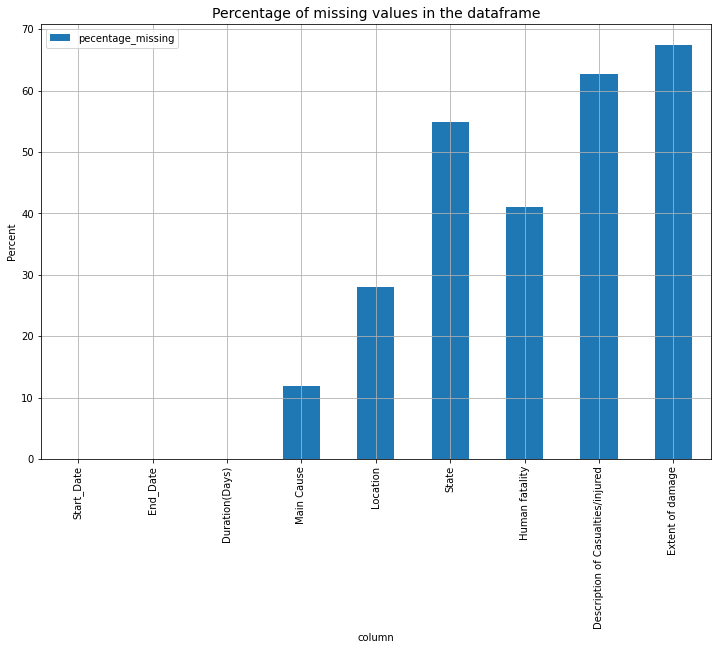

In [ ]:
import matplotlib.pyplot as plt
percent_missing.plot(kind='bar', figsize=(12,8), grid=True)
plt.title('Percentage of missing values in the dataframe', fontsize=14)
plt.xlabel('column')
plt.ylabel('Percent')
plt.show()

## Combining all dataset for further analysis

In [ ]:
# Shapes of all the datasets from Data1 to Data8
df1.isnull().sum().sum(), new_df.isnull().sum().sum(), df3.isnull().sum().sum(), df4.isnull().sum().sum(), df5.isnull().sum().sum(), df_new.isnull().sum().sum(), df_new2.isnull().sum().sum()

(31281, 0, 871704, 0, 0, 0, 0)

### Let's utilize the most out of the five useful datasets : new_df, df4, df5, df_new and df_new2

In [ ]:
# Dataset1: (Data related to all natural disasters)
new_df.columns, new_df.shape

(Index(['Country name', 'Year', 'Number of deaths from drought',
        'Number of people injured from drought',
        'Number of people affected from drought',
        'Number of people left homeless from drought',
        'Number of total people affected by drought',
        'Reconstruction costs from drought', 'Insured damages against drought',
        'Total economic damages from drought',
        ...
        'Total economic damages from floods as a share of GDP',
        'Total economic damages from landslides as a share of GDP',
        'Total economic damages from mass movements as a share of GDP',
        'Total economic damages from storms as a share of GDP',
        'Total economic damages from volcanic activity as a share of GDP',
        'Total economic damages from volcanic activity as a share of GDP.1',
        'total_damages_pct_gdp_glacial_lake', 'deaths_rate_per_100k_storm',
        'injured_rate_per_100k_storm',
        'total_affected_rate_per_100k_all_disasters']

In [ ]:
# Dataset2: (Data related to both natural and man-made disasters with description and date)
df4.columns, df4.shape

(Index(['disaster_title', 'disaster_description', 'date_occured'], dtype='object'),
 (207, 3))

In [ ]:
# Dataset3: (Data related to earthquakes occurances across the globe in human history)
df5.columns, df5.shape

(Index(['Country', 'Year', 'Significant earthquake events (NGDC-NASA)'], dtype='object'),
 (143640, 3))

In [ ]:
df5['Year'] = df5['Year'].astype('str')

In [ ]:
df5.rename(columns={'Country':'Country Name'}, inplace=True)

In [ ]:
df5['Country Name'].nunique()

152

In [ ]:
def capitalize(df):
    cap = df.upper()
    return cap

In [ ]:
df5['Country Name'] = df5['Country Name'].apply(capitalize)

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143640 entries, 0 to 143639
Data columns (total 3 columns):
 #   Column                                     Non-Null Count   Dtype 
---  ------                                     --------------   ----- 
 0   Country Name                               143640 non-null  object
 1   Year                                       143640 non-null  object
 2   Significant earthquake events (NGDC-NASA)  143640 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.3+ MB


In [ ]:
# Dataset4: (Data related to earthquakes and people affected by it across the globe in human history)
df_new.columns

Index(['Year', 'Country Name', 'people_affected_by_natural_disaster'], dtype='object')

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4928 entries, 0 to 24534
Data columns (total 3 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 4928 non-null   object 
 1   Country Name                         4928 non-null   object 
 2   people_affected_by_natural_disaster  4928 non-null   float64
dtypes: float64(1), object(2)
memory usage: 154.0+ KB


In [ ]:
# Dataset5: (Data related to earthquakes and people got homeless as a result across the globe in human history)
df_new2.columns

Index(['Year', 'Country Name', 'people_homeless_by_natural_disaster'], dtype='object')

In [ ]:
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4928 entries, 0 to 24534
Data columns (total 3 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 4928 non-null   object 
 1   Country Name                         4928 non-null   object 
 2   people_homeless_by_natural_disaster  4928 non-null   float64
dtypes: float64(1), object(2)
memory usage: 154.0+ KB


### Out the five datasets, three can be easily combine using inner join. Let's do this!

In [ ]:
df_combined1 = pd.merge(df5, df_new, how='inner', left_on=['Year','Country Name'], right_on=['Year','Country Name'])

In [ ]:
df_combined2 = pd.merge(df_combined1, df_new2, how='inner', left_on=['Year','Country Name'], right_on=['Year','Country Name'])

## So, we combined the three very similar datasets. Let's explore the rest two datasets and try to relate it with this combined one.

In [ ]:
new_df.head(3)

,Country name,Year,Number of deaths from drought,Number of people injured from drought,Number of people affected from drought,Number of people left homeless from drought,Number of total people affected by drought,Reconstruction costs from drought,Insured damages against drought,Total economic damages from drought,Death rates from drought,Injury rates from drought,"Number of people affected by drought per 100,000",Homelessness rate from drought,"Total number of people affected by drought per 100,000",Number of deaths from earthquakes,Number of people injured from earthquakes,Number of people affected by earthquakes,Number of people left homeless from earthquakes,Number of total people affected by earthquakes,Reconstruction costs from earthquakes,Insured damages against earthquakes,Total economic damages from earthquakes,Death rates from earthquakes,Injury rates from earthquakes,"Number of people affected by earthquakes per 100,000",Homelessness rate from earthquakes,"Total number of people affected by earthquakes per 100,000",Number of deaths from disasters,Number of people injured from disasters,Number of people affected by disasters,Number of people left homeless from disasters,Number of total people affected by disasters,Reconstruction costs from disasters,Insured damages against disasters,Total economic damages from disasters,Death rates from disasters,Injury rates from disasters,"Number of people affected by disasters per 100,000",Homelessness rate from disasters,Number of deaths from volcanic activity,Number of people injured from volcanic activity,Number of people affected by volcanic activity,Number of people left homeless from volcanic activity,Number of total people affected by volcanic activity,Reconstruction costs from volcanic activity,Insured damages against volcanic activity,Total economic damages from volcanic activity,Death rates from volcanic activity,Injury rates from volcanic activity,"Number of people affected by volcanic activity per 100,000",Homelessness rate from volcanic activity,"Total number of people affected by volcanic activity per 100,000",Number of deaths from floods,Number of people injured from floods,Number of people affected by floods,Number of people left homeless from floods,Number of total people affected by floods,Reconstruction costs from floods,Insured damages against floods,Total economic damages from floods,Death rates from floods,Injury rates from floods,"Number of people affected by floods per 100,000",Homelessness rate from floods,"Total number of people affected by floods per 100,000",Number of deaths from mass movements,Number of people injured from mass movements,Number of people affected by mass movements,Number of people left homeless from mass movements,Number of total people affected by mass movements,Reconstruction costs from mass movements,Insured damages against mass movements,Total economic damages from mass movements,Death rates from mass movements,Injury rates from mass movements,"Number of people affected by mass movements per 100,000",Homelessness rate from mass movements,"Total number of people affected by mass movements per 100,000",Number of deaths from storms,Number of people injured from storms,Number of people affected by storms,Number of people left homeless from storms,Number of total people affected by storms,Reconstruction costs from storms,Insured damages against storms,Total economic damages from storms,"Number of people affected by storms per 100,000",Homelessness rate from storms,"Total number of people affected by storms per 100,000",Number of deaths from landslides,Number of people injured from landslides,Number of people affected by landslides,Number of people left homeless from landslides,Number of total people affected by landslides,Reconstruction costs from landslides,Insured damages against landslides,Total economic damages from landslides,Death rates from landslides,Injury rates from landslides,"Number of people affected by landslides per 100,00

In [ ]:
new_df['Country name'] = new_df['Country name'].apply(capitalize)

<ipython-input-115-7f6aff69e3e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Country name'] = new_df['Country name'].apply(capitalize)


In [ ]:
new_df.rename(columns={'Country name':'Country Name'}, inplace=True)

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [ ]:
new_df['Year'] = new_df['Year'].astype('str')

<ipython-input-117-4c4a05bacedc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Year'] = new_df['Year'].astype('str')


In [ ]:
df_combined_final = pd.merge(df_combined2, new_df, how='left', left_on=['Year','Country Name'], right_on=['Year','Country Name'])

In [ ]:
df_combined_final.shape

(3460, 170)

In [ ]:
non_null_final_df = df_combined_final[~df_combined_final['Number of deaths from drought'].isna()]

In [ ]:
non_null_final_df[non_null_final_df['Year'].isin(['2002','2010'])]

,Country Name,Year,Significant earthquake events (NGDC-NASA),people_affected_by_natural_disaster,people_homeless_by_natural_disaster,Number of deaths from drought,Number of people injured from drought,Number of people affected from drought,Number of people left homeless from drought,Number of total people affected by drought,Reconstruction costs from drought,Insured damages against drought,Total economic damages from drought,Death rates from drought,Injury rates from drought,"Number of people affected by drought per 100,000",Homelessness rate from drought,"Total number of people affected by drought per 100,000",Number of deaths from earthquakes,Number of people injured from earthquakes,Number of people affected by earthquakes,Number of people left homeless from earthquakes,Number of total people affected by earthquakes,Reconstruction costs from earthquakes,Insured damages against earthquakes,Total economic damages from earthquakes,Death rates from earthquakes,Injury rates from earthquakes,"Number of people affected by earthquakes per 100,000",Homelessness rate from earthquakes,"Total number of people affected by earthquakes per 100,000",Number of deaths from disasters,Number of people injured from disasters,Number of people affected by disasters,Number of people left homeless from disasters,Number of total people affected by disasters,Reconstruction costs from disasters,Insured damages against disasters,Total economic damages from disasters,Death rates from disasters,Injury rates from disasters,"Number of people affected by disasters per 100,000",Homelessness rate from disasters,Number of deaths from volcanic activity,Number of people injured from volcanic activity,Number of people affected by volcanic activity,Number of people left homeless from volcanic activity,Number of total people affected by volcanic activity,Reconstruction costs from volcanic activity,Insured damages against volcanic activity,Total economic damages from volcanic activity,Death rates from volcanic activity,Injury rates from volcanic activity,"Number of people affected by volcanic activity per 100,000",Homelessness rate from volcanic activity,"Total number of people affected by volcanic activity per 100,000",Number of deaths from floods,Number of people injured from floods,Number of people affected by floods,Number of people left homeless from floods,Number of total people affected by floods,Reconstruction costs from floods,Insured damages against floods,Total economic damages from floods,Death rates from floods,Injury rates from floods,"Number of people affected by floods per 100,000",Homelessness rate from floods,"Total number of people affected by floods per 100,000",Number of deaths from mass movements,Number of people injured from mass movements,Number of people affected by mass movements,Number of people left homeless from mass movements,Number of total people affected by mass movements,Reconstruction costs from mass movements,Insured damages against mass movements,Total economic damages from mass movements,Death rates from mass movements,Injury rates from mass movements,"Number of people affected by mass movements per 100,000",Homelessness rate from mass movements,"Total number of people affected by mass movements per 100,000",Number of deaths from storms,Number of people injured from storms,Number of people affected by storms,Number of people left homeless from storms,Number of total people affected by storms,Reconstruction costs from storms,Insured damages against storms,Total economic damages from storms,"Number of people affected by storms per 100,000",Homelessness rate from storms,"Total number of people affected by storms per 100,000",Number of deaths from landslides,Number of people injured from landslides,Number of people affected by landslides,Number of people left homeless from landslides,Number of total people affected by landslides,Reconstruction costs from landslides,Insured damages against landslides,Total economic damages from lands

### Now, let's look into the last dataset

In [ ]:
df4.shape

(207, 3)

In [ ]:
df4

,disaster_title,disaster_description,date_occured
0,1990 Andhra Pradesh cyclone,the andhra pradesh cyclone or the machilipat...,5/4/1990
1,Indian Airlines Flight 605,indian airlines flight was a scheduled domest...,2/14/1990
2,1991 Uttarkashi earthquake,the uttarkashi earthquake also known as the g...,10/20/1991
3,1992 India–Pakistan floods,the india–pakistan floods was a deadliest flo...,9/7/1992
4,Mahamaham stampede,mahamaham stampede was a disaster that occurre...,2/18/1992
...,...,...,...
202,Cyclone Tauktae,extremely severe cyclonic storm tauktae burmes...,5/14/2021
203,Cyclone Yaas,very severe cyclonic storm yaas arabic pronunc...,5/23/2021
204,Maharashtra floods,a series of floods took place across the india...,7/22/2021
205,Saurashtra flood,following heavy rain in september the saurash...,9/1/2021


## df4 dataset has no relavance to the combined dataset. So, we will explore this separately with a different method.

____________________________________________________________________

to be continued...